### Import Libraries & Dataset

In [60]:
# Load necessary libraries
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import backend as k
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from numpy.random import seed
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense




Here X_train contains 60,000 training images’ data each of size 28x28 and y_train contains their corresponding labels. Similarly, X_test contains 10,000 testing images’ data each of dimension 28x28 and y_test contains their corresponding labels.

Let's see the first 10 data of the train dataset.

In [61]:
# Load whole dataset initially 

(X_train_init,y_train_init), (X_test_init,y_test_init) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train_init.shape, y_train_init.shape))
print('Test: X=%s, y=%s' % (X_test_init.shape, y_test_init.shape))



Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


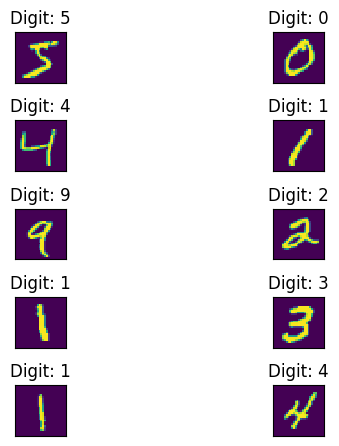

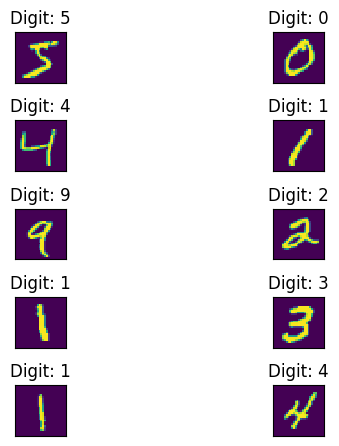

In [62]:

import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.tight_layout()
  plt.imshow(X_train_init[i], interpolation='none')
  plt.title("Digit: {}".format(y_train_init[i]))
  plt.xticks([])
  plt.yticks([])
fig

## Pre-processing the images

1.   Reshape the dataset to have a single channel of columns 
2.   It is known that [MNIST dataset images images are 28x28 with pixel values from 0 to 255.](https://docs.rs/mnist/latest/mnist/) So, that's why, it would be a good idea to scale the pixel data using that information. (maxValue=255)



In [63]:
 # Reshape dataset to have a single channel of columns
X = X_train_init.reshape((60000, 784))
X_test = X_test_init.reshape((10000, 784))

# Prepare the pixel data (images) by scaling them. 

X = X.astype('float32')
X_test = X_test.astype('float32')
X= X/255
X_test= X_test/255
print('X shape:', X.shape)



X shape: (60000, 784)


#### One-hot encoding on target values

We need to use one hot encoding to conver the each target value into a binary vectors (of length 10) with a 1 in the index of the value itself. For example, if the y value is 4, we will be converting it to [0 0  0 1 0 0 0 0 0 0] array using one-hot encoding array. 





In [64]:

y = tensorflow.keras.utils.to_categorical(y_train_init, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test_init, 10)

## Modeling

### Fully Connected Layers Model Building





In [65]:

fully_connected_model = Sequential()
fully_connected_model.add(Dense(256, input_dim=28*28, activation='relu'))
fully_connected_model.add(Dense(256, activation='relu'))
fully_connected_model.add(Dense(32, activation='relu'))
fully_connected_model.add(Dense(10, activation='softmax'))

fully_connected_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


## model summary 
fully_connected_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,306 (1.05 MB)

 Trainable params: 275,306 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

#### Model Fitting

In [66]:

# Fitting fully connected model with validation_split as 0.3
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',  min_delta=0, patience=20, verbose=2)
savebest = tensorflow.keras.callbacks.ModelCheckpoint('best.weights.keras', monitor='val_loss', verbose=1, save_best_only=True)

fully_connected_model_fit = fully_connected_model.fit(X, y, batch_size=32, epochs=20, verbose=1, validation_split=0.3,
                                                      callbacks=[earlystopping,savebest])
     

Epoch 1/20
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8620 - loss: 0.4448
Epoch 1: val_loss improved from inf to 0.14202, saving model to best.weights.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8625 - loss: 0.4433 - val_accuracy: 0.9576 - val_loss: 0.1420
Epoch 2/20
1297/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9695 - loss: 0.1018
Epoch 2: val_loss improved from 0.14202 to 0.12621, saving model to best.weights.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9695 - loss: 0.1018 - val_accuracy: 0.9629 - val_loss: 0.1262
Epoch 3/20
1295/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.0672
Epoch 3: val_loss did not improve from 0.12621
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9796 - loss: 0.0672 - val_accuracy: 0.9567 - val_loss: 0.1542
Epoch 4/20
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.0488
Epoch 4: val_loss improved from 0.12621 to 0.11349, saving model to best.w

#### Prediction and Model Evaluation

In [67]:
_, acc = fully_connected_model.evaluate(X, y, verbose=0)
print('Accuracy of Training dataset with Fully Connected Layers is %.3f' % (acc * 100.0))
_, acc_test = fully_connected_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of Testing dataset with Fully Connected Layers is %.3f' % (acc_test * 100.0))


Accuracy of Training dataset with Fully Connected Layers is 98.940
Accuracy of Testing dataset with Fully Connected Layers is 97.580


##### Accuracy and Loss Plots of Train & Test Dataset


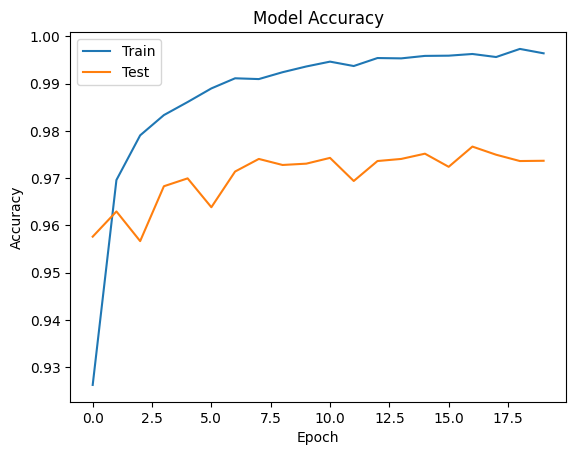

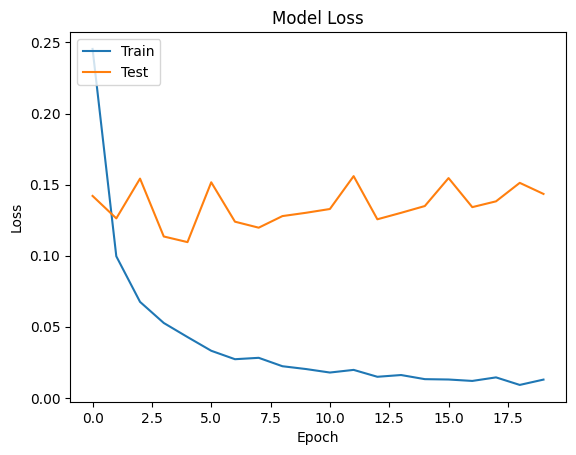

In [68]:
# Accuracy Plot
plt.plot(fully_connected_model_fit.history['accuracy'])
plt.plot(fully_connected_model_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(fully_connected_model_fit.history['loss'])
plt.plot(fully_connected_model_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##### Confusion Matrix and Classification Report

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#multi-classification confusion matrix
y_pred_fc = np.argmax(fully_connected_model.predict(X_test) , axis=1)
cm_fc= confusion_matrix(y_true = np.argmax(y_test, axis=1), y_pred = y_pred_fc)
print(cm_fc)
# classification report of FC
print(classification_report(np.argmax(y_test, axis=1), y_pred_fc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[ 971    0    1    0    0    0    5    2    1    0]
 [   0 1127    1    0    0    0    3    1    3    0]
 [   2    3 1013    2    2    0    3    5    2    0]
 [   0    1    2  986    0   10    0    8    2    1]
 [   2    4    3    1  932    0    5    3    1   31]
 [   5    1    0    7    1  870    4    1    1    2]
 [   1    4    0    1    2    4  942    0    3    1]
 [   3    1    7    3    0    0    0 1010    2    2]
 [   6    0    9   13    4    4    6    5  923    4]
 [   3    4    1    7    2    2    1    4    1  984]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.98      0.98      0.98       892
           6       0.97      0.98      0.98      

### CNN Model Building

In [70]:
 # Reshape dataset to have a single channel of columns
X = X_train_init.reshape((60000, 28,28,1))
X_test = X_test_init.reshape((10000, 28,28,1))

 # Prepare the pixel data (images) by scaling them. 

X = X.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One hot encoding for target value
y = tensorflow.keras.utils.to_categorical(y_train_init,10)
y_test = tensorflow.keras.utils.to_categorical(y_test_init,10)
     

In [71]:
y_test.shape
y.shape
X.shape
X_test.shape

(10000, 28, 28, 1)

In [72]:
model = Sequential()
# Convolutional layer with rectified linear unit activation
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
# Use pooling to reduce the spatial resolution of the image while keeping the important features
model.add(MaxPooling2D(pool_size=(2, 2)))
# Use batch normalization to reduce the internal covariate shift
model.add(BatchNormalization())
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Use pooling to reduce the spatial resolution of the image while keeping the important features
model.add(MaxPooling2D(pool_size=(2, 2)))
# Use batch normalization to reduce the internal covariate shift
model.add(BatchNormalization())
# Flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# Fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
# Output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))


model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,418 (880.54 KB)

 Trainable params: 225,226 (879.79 KB)

 Non-trainable params: 192 (768.00 B)

#### Model Fitting

In [73]:
earlystopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',  min_delta=0, patience=20, verbose=1)
savebest = tensorflow.keras.callbacks.ModelCheckpoint('best.weights.keras', monitor='val_loss', verbose=1, save_best_only=True)

model_fit= model.fit(X, y, epochs=20, batch_size=32, verbose=0, validation_data = (X_test, y_test),callbacks=[earlystopping,savebest])


Epoch 1: val_loss improved from inf to 0.04735, saving model to best.weights.keras

Epoch 2: val_loss improved from 0.04735 to 0.03890, saving model to best.weights.keras

Epoch 3: val_loss did not improve from 0.03890

Epoch 4: val_loss did not improve from 0.03890

Epoch 5: val_loss did not improve from 0.03890

Epoch 6: val_loss improved from 0.03890 to 0.03692, saving model to best.weights.keras

Epoch 7: val_loss did not improve from 0.03692

Epoch 8: val_loss improved from 0.03692 to 0.03587, saving model to best.weights.keras

Epoch 9: val_loss improved from 0.03587 to 0.03089, saving model to best.weights.keras

Epoch 10: val_loss did not improve from 0.03089

Epoch 11: val_loss did not improve from 0.03089

Epoch 12: val_loss did not improve from 0.03089

Epoch 13: val_loss did not improve from 0.03089

Epoch 14: val_loss did not improve from 0.03089

Epoch 15: val_loss did not improve from 0.03089

Epoch 16: val_loss did not improve from 0.03089

Epoch 17: val_loss did not i

#### Prediction and Model Evaluation

In [74]:
_, acc_test = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of Testing dataset with CNN is %.3f' % (acc_test * 100.0))
_, acc = model.evaluate(X, y, verbose=0)
print('Accuracy of Training dataset with CNN is %.3f' % (acc * 100.0))

Accuracy of Testing dataset with CNN is 99.230
Accuracy of Training dataset with CNN is 99.920


#### Accuracy and Loss Plots of Train & Test Dataset


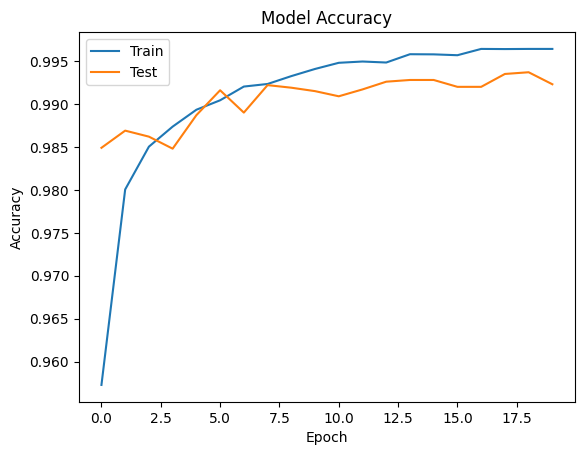

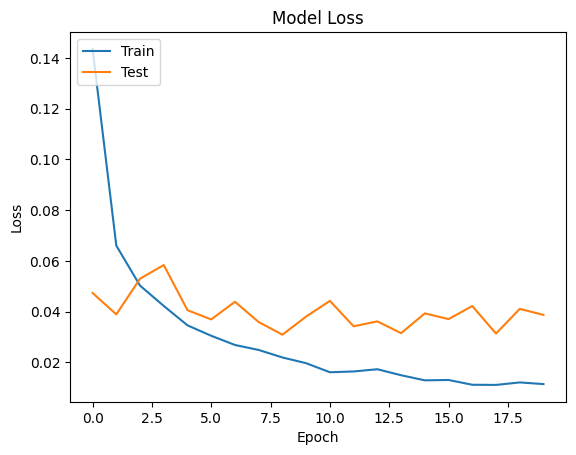

In [75]:
# summarize history for accuracy
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##### Confusion Matrix and Classification Report

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#multi-classification confusion matrix
y_pred_cnn = np.argmax(model.predict(X_test) , axis=1)
cm_cnn= confusion_matrix(y_true = np.argmax(y_test, axis=1), y_pred = y_pred_cnn)
print(cm_cnn)
# classification report of CNN
print(classification_report(np.argmax(y_test, axis=1), y_pred_cnn))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 976    1    1    0    0    0    1    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    1 1029    0    0    0    0    2    0    0]
 [   0    0    1  995    0   10    0    3    1    0]
 [   0    0    0    0  976    0    0    1    1    4]
 [   1    0    0    1    0  888    1    0    1    0]
 [   1    2    0    0    2    1  951    0    1    0]
 [   0    4    3    0    0    0    0 1019    1    1]
 [   1    0    1    1    0    0    0    1  969    1]
 [   0    1    0    0    4    5    1    5    8  985]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      1.00      0.99       892
           6       1.00      0.99      0.99      

### EfficientNetB3 (Pre-trained) Model Building

In [77]:
# !pip install efficientnet

#necessary libraries
import efficientnet.keras as effnet
from efficientnet.tfkeras import center_crop_and_resize, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten 
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline


In [78]:
# Data preparation

(X, y), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

# expand new axis, channel axis 
X = np.expand_dims(X, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# we need 3 channels
X = np.repeat(X, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)

# scale the dataset
X = X.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# resize the input shape , i.e. old shape: 28, new shape: 64
X = tensorflow.image.resize(X, [32,32]) 
X_test = tensorflow.image.resize(X_test, [32,32])

# one hot 
y = tensorflow.keras.utils.to_categorical(y , num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test , num_classes=10)

print(X.shape, y.shape, X_test.shape,y_test.shape)



(60000, 32, 32, 3) (60000, 10) (10000, 32, 32, 3) (10000, 10)


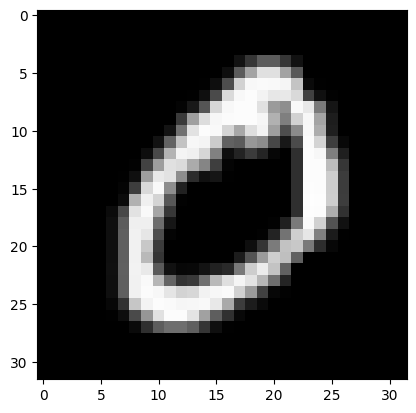

In [79]:
plt.imshow(X[1])

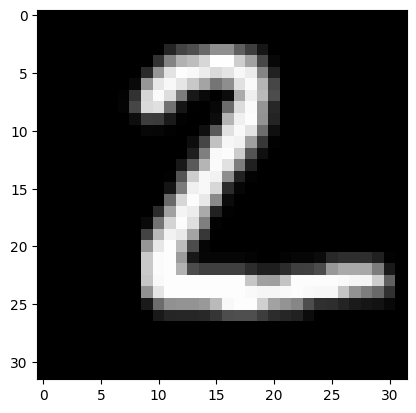

In [80]:
plt.imshow(X_test[1])

In [81]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout

width_shape = 32
height_shape = 32
image_input = Input(shape=(width_shape, height_shape, 3))



final_model = Sequential()

effnet = EfficientNetB3(weights='imagenet', include_top=False,pooling='avg',
	                                                                  input_tensor=image_input)
final_model.add(effnet)
final_model.layers[0].trainable = False # freeze efficennet layers
final_model.add(Flatten())
final_model.add(Dense(512, activation="relu"))
final_model.add(Dropout(0.25))
final_model.add(Dense(10, activation='softmax'))
final_model.summary()


final_model.compile(
          optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb3 (Functional)     │ (None, 1536)           │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,575,609 (44.16 MB)

 Trainable params: 792,074 (3.02 MB)

 Non-trainable params: 10,783,535 (41.14 MB)

#### Visualize the activation of the learned feature map on a selected layer


In [83]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

for i in range(len(effnet.layers)):
    layer = effnet.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

4 stem_conv_pad (None, 33, 33, 3)
5 stem_conv (None, 16, 16, 40)
8 block1a_dwconv (None, 16, 16, 40)
16 block1a_project_conv (None, 16, 16, 24)
18 block1b_dwconv (None, 16, 16, 24)
26 block1b_project_conv (None, 16, 16, 24)
30 block2a_expand_conv (None, 16, 16, 144)
33 block2a_dwconv_pad (None, 17, 17, 144)
34 block2a_dwconv (None, 8, 8, 144)
42 block2a_project_conv (None, 8, 8, 32)
44 block2b_expand_conv (None, 8, 8, 192)
47 block2b_dwconv (None, 8, 8, 192)
55 block2b_project_conv (None, 8, 8, 32)
59 block2c_expand_conv (None, 8, 8, 192)
62 block2c_dwconv (None, 8, 8, 192)
70 block2c_project_conv (None, 8, 8, 32)
74 block3a_expand_conv (None, 8, 8, 192)
77 block3a_dwconv_pad (None, 11, 11, 192)
78 block3a_dwconv (None, 4, 4, 192)
86 block3a_project_conv (None, 4, 4, 48)
88 block3b_expand_conv (None, 4, 4, 288)
91 block3b_dwconv (None, 4, 4, 288)
99 block3b_project_conv (None, 4, 4, 48)
103 block3c_expand_conv (None, 4, 4, 288)
106 block3c_dwconv (None, 4, 4, 288)
114 block3c_project_c

In [84]:
feature_map_model = Model(inputs=effnet.inputs , outputs=effnet.layers[5].output)
# Let's choosethe 5th layer, having (None, 16, 16, 40) dimension

(32, 32, 3)
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


(1, 16, 16, 40)

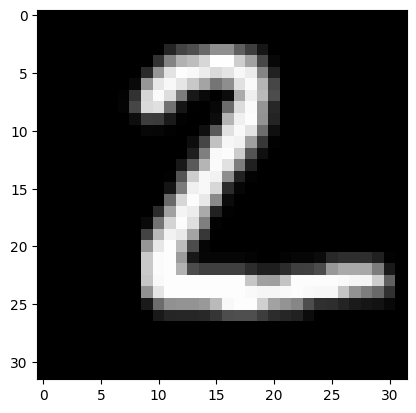

In [85]:

img = X_test[1]
print(img.shape)
plt.imshow(img)
img=tf.expand_dims(X_test[1], axis=0)
print(img.shape)

feature_maps = feature_map_model.predict(img)
feature_maps.shape
# (1,16,16,40), so, the result will be a feature map of (1,16,16,40) since the 5th layer has the dimension as (None, 16, 16, 40)


In [86]:
feature_maps.shape

(1, 16, 16, 40)

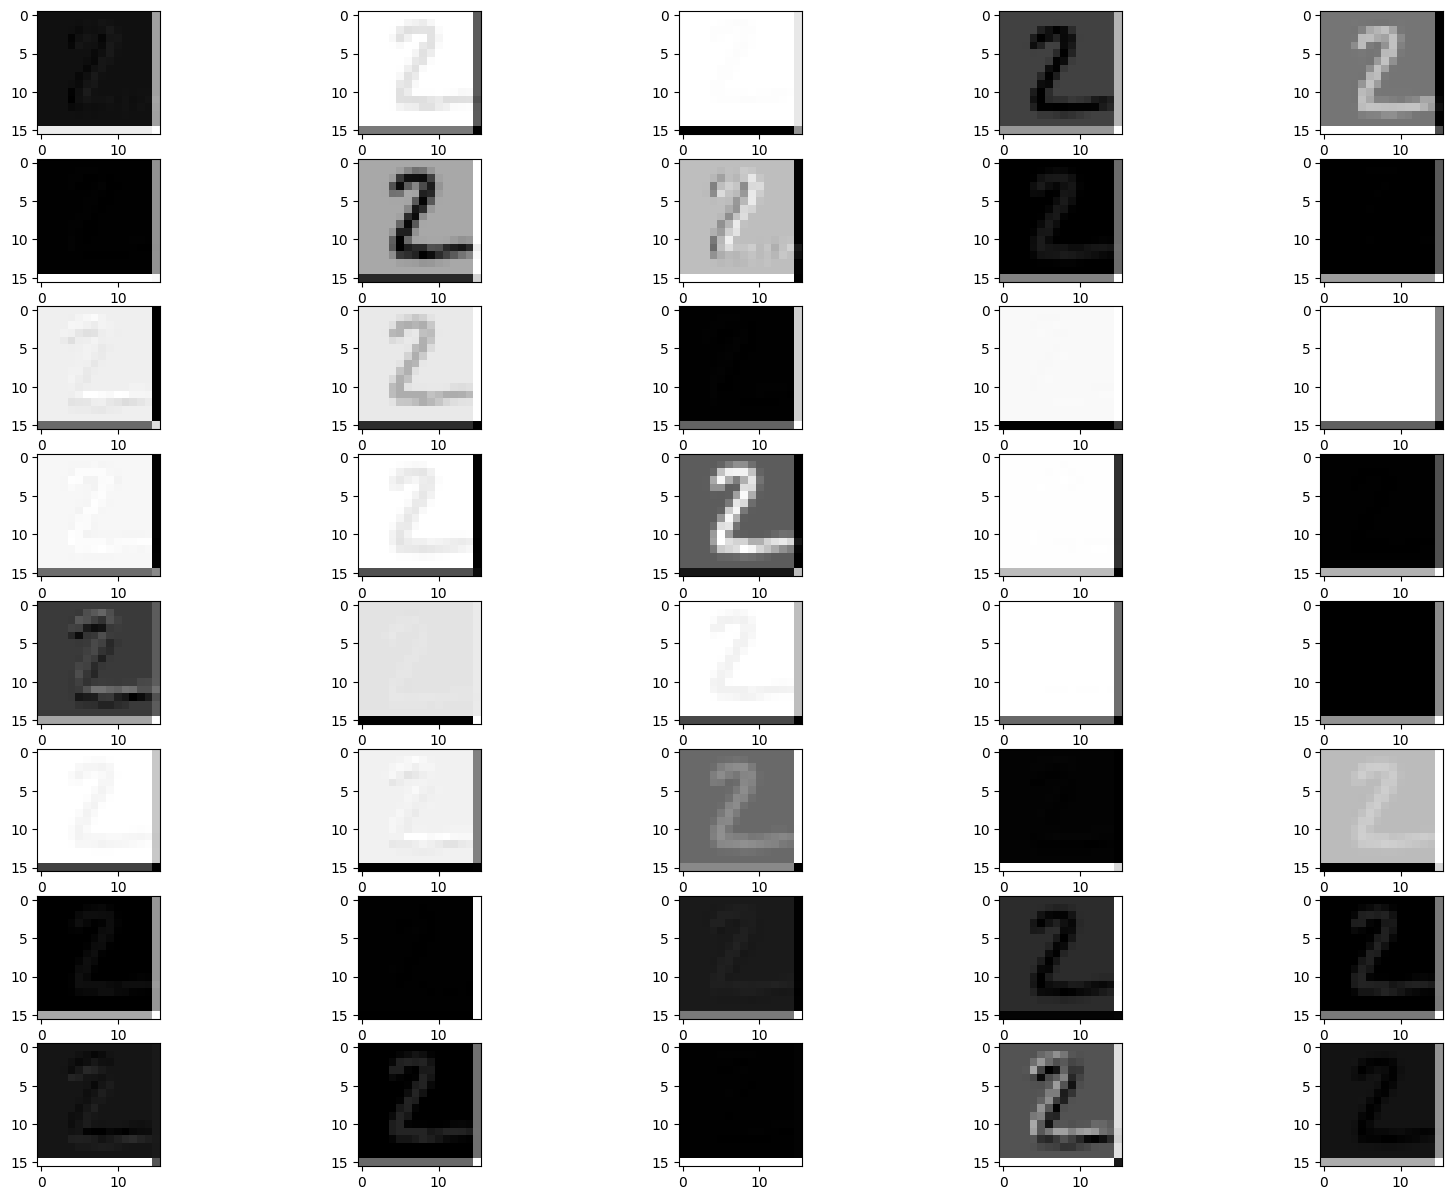

In [87]:

fig = pyplot.figure(figsize=(20,15))
for i in range(1,feature_maps.shape[3]+1):
# So, we can plot it in a 8x5 subplots
    pyplot.subplot(8,5,i)
    pyplot.imshow(feature_maps[0,:,:,i-1] , cmap='gray')
    
pyplot.show()